<_io.TextIOWrapper name='data/dr9.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/dr8.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/pk7.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/pk6.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/pk4.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/pk5.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/pk1.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/pk2.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/pk3.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/pk8.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/pk9.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/dr1.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/dr3.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/dr2.txt' mode='r' encoding='UTF-8'>
<_io.TextIOWrapper name='data/dr6.txt' mode='r' encoding='UTF-8'>
<_io.TextI

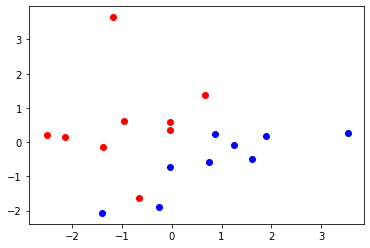

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def build_dictionary(prefix =''):

    filelist = os.listdir('data/') #reads directory
    word_dict = {} #creates dictionary for words found
    word_total = 0 #counts total number of words
    file_count = 0 #counts total number of files read
    
    for file in filelist: #goes through each file
        if prefix in file: #checks if part of a file name is passed in
            scan = open("data/" + file, 'r')
            for line in scan: 
                for word in line.split():
                    word = stripWord(word)
                    if( len(word) > 0 ): #checks if word is greater than length 0
                        if word in word_dict:
                            word_dict[word] += 1 # already in dictionary, increment
                        else:
                            word_dict[word] = 1 #add to dictionary as 1
                        word_total+=1 #used for 
            file_count += 1 
    
    for i in word_dict:
        word_dict[i] = round(word_dict[i]*(100/word_total), 2) #converts to frequency percentage
        
    return word_dict   

    
def comp_frequency():
    master_list = build_dictionary('') #creates dictionary and sorts it
    sort_list = sort_dictionary(master_list) #sorts list
    #print_dict(sort_list)
    top_list = top25(sort_list) #gets top 25 of sorted list
        
    
    a, b = 9, 25 #size of array
    F1 = np.zeros((a, b)) #creates array for pk
    F2 = np.zeros((a, b)) #creates array for dr 

    for i in range(a): #increment for number of rows for F array
        
        pk_dict = build_dictionary('pk'+str(i+1)) #iterate through pk 1-9 using i+1
        dr_dict = build_dictionary('dr'+str(i+1)) #iterate through dr 1-9 using i+1
        b_position = 0 #column number for F array
        for rank in top_list: #iterate through top 25 
            if rank[0] not in pk_dict: #if [0]th element of tuple (the word) is not in the dictionary
                pk_dict[rank[0]] = 0 #then add the key
            F1[i,b_position] = pk_dict[rank[0]] #add value of key in the dictionary to the F1 array
            if rank[0] not in dr_dict: 
                dr_dict[rank[0]] = 0
            F2[i,b_position] = dr_dict[rank[0]]           
            b_position += 1  #increments column number so can move to the next matrix point  
    
    F   = np.concatenate((F1,F2),axis=0)
    pca = PCA(n_components=2)
    Fp  = pca.fit(F).transform(F)
    plt.scatter( Fp[0:9,0], Fp[0:9,1], color='b')
    plt.scatter( Fp[9:20,0], Fp[9:20,1], color='r' )    
            

    
def stripWord( w ): 
    w = w.lower()
    w = ''.join([i for i in w if i.isalpha()])
    return( w )


def sort_dictionary( D ):
    Ds = sorted(D.items(), key=lambda x:x[1], reverse=True)               
    return Ds

def print_dict(D): #takes list of tuples
    for a,b in D: #deconstructs
        print(a,b) # prints on separate lines

def top25(D): #takes sorted list
    top25_list = []
    for i in range(25):#appends to list 25 times
        top25_list.append(D[i])
    return top25_list


comp_frequency()